In [25]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df = pd.read_csv("dataset.csv")
df.head()

,Отметка времени,Итоговая оценка за экзамен по ТОЭ,"С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)","Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",Оценка по физике в школе,Оценка по физике в последнем семестре?,Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Вели конспект по занятиям? (лекции и/или практики),Выходили к доске на практике?,...,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,"Если работали/проходили стажировку, то какая ставка (загрузка):",Где проживаете?,"Есть кот дома? (в месте, где сейчас живете)",Есть родной брат/сестра?,Гражданство,Сколько в среднем играли в прошлом семестре? Укажите число в часах,Была ли стипендия в 3 семестре?,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,2024/09/30 11:51:10 PM GMT+3,5.0,1.0,75,5,5.0,5.0,5.0,да,да,...,нет,0.00,общежитие 8,нет,да,KAZ,10,да,9,1
1,2024/09/30 11:53:32 PM GMT+3,3.0,1.0,75,4,5.0,4.0,5.0,да,нет,...,нет,0.00,дома,нет,да,RUS,20,нет,7,6
2,2024/09/30 11:53:33 PM GMT+3,3.0,1.0,75,5,4.0,5.0,5.0,да,нет,...,да,0.25,дома,да,да,RUS,168,да,7,3
3,2024/09/30 11:57:50 PM GMT+3,3.0,1.0,75,5,4.0,4.0,4.0,нет,нет,...,да,0.50,общежитие 8,нет,да,KAZ,18,нет,7,2
4,2024/09/30 11:59:56 PM GMT+3,4.0,1.0,100,4,3.0,4.0,5.0,нет,нет,...,нет,NaN,дома,нет,да,RUS,20,нет,10,5


<h3>Редактируем таблицу</h3>
<p>Заменяем все значения Да/Нет на 1/0. Меняем все значения на тип float. Удаляем ненужный столбец отметка времени. Удаляем столбцы с типом object.</p>

In [26]:
df = df.replace({'да': 1, 'нет': 0})
df = df.astype(float, errors='ignore')
df = df.drop('Отметка времени', axis=1)
df = df.drop('Гражданство', axis=1)
df = df.drop('Где проживаете?', axis=1)
df = df.drop('Сколько в среднем играли в прошлом семестре? Укажите число в часах', axis=1)

C:\Users\Semen\AppData\Local\Temp\ipykernel_15792\281158392.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'да': 1, 'нет': 0})


In [27]:
columns = df.columns
columns = ['итоговая_оценка', 'попытки_экзамен', 'посещаемость', 'школьная_оценка', 'оценка_семестр', 
           'оценка_идз', 'оценка_лабораторные', 'конспекты', 'ответ_у_доски', 'оценка_контрольная', 
           'статус_трудоустройства', 'зарплата', 'наличие_кота', 'братья_сестры', 'стипендия', 
           'психическое_здоровье', 'уровень_усталости']
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   итоговая_оценка         34 non-null     float64
 1   попытки_экзамен         34 non-null     float64
 2   посещаемость            35 non-null     float64
 3   школьная_оценка         35 non-null     float64
 4   оценка_семестр          34 non-null     float64
 5   оценка_идз              34 non-null     float64
 6   оценка_лабораторные     34 non-null     float64
 7   конспекты               35 non-null     float64
 8   ответ_у_доски           35 non-null     float64
 9   оценка_контрольная      35 non-null     float64
 10  статус_трудоустройства  35 non-null     float64
 11  зарплата                29 non-null     float64
 12  наличие_кота            35 non-null     float64
 13  братья_сестры           35 non-null     float64
 14  стипендия               34 non-null     floa

In [28]:
df = df.fillna(0.0)

<h3>Сторим матрицу корреляций</h3>

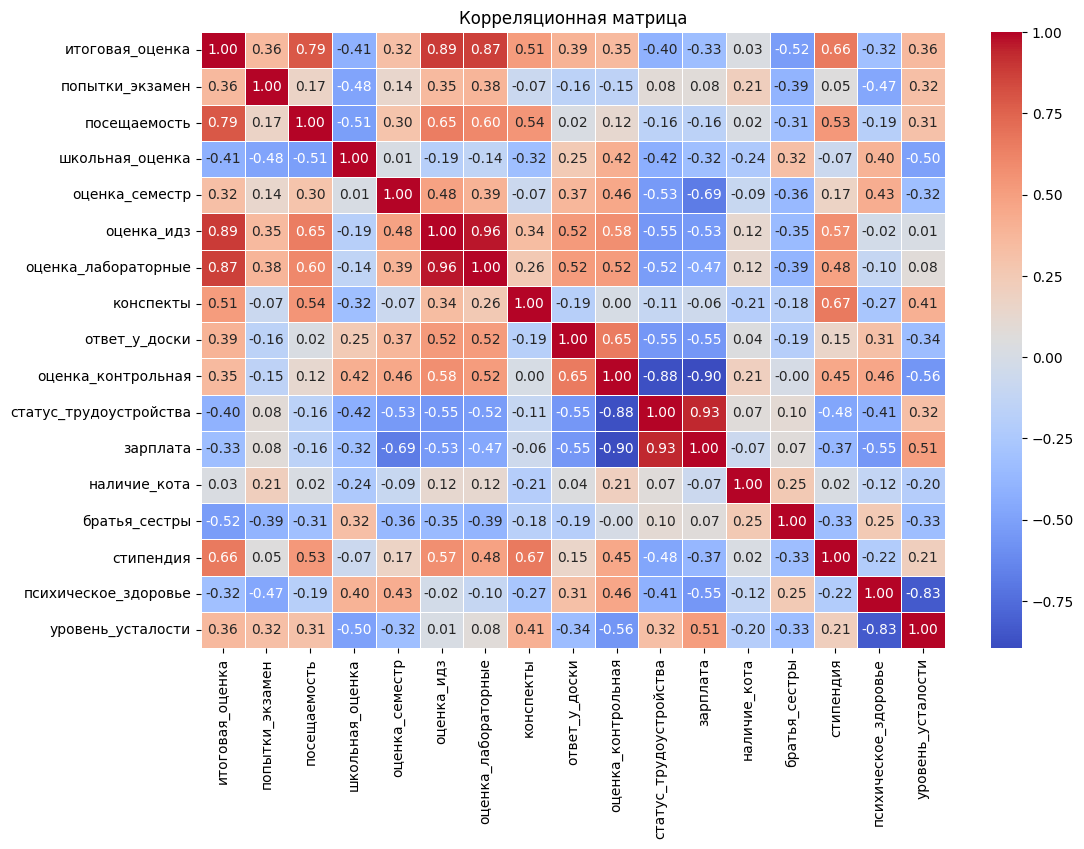

In [29]:
c_m = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

<p>Можно увидеть, что такие столбцы, как 
<ul>
трудоустроенность
</ul>
<ul>
ставка
</ul>
<ul>
наличие брата/сестры
</ul>
<ul>
количество попыток сдачи экзамена
</ul>
<ul> 
наличие кота
</ul>
<ul>
проблемы с психическим здоровьем
</ul>
<ul>
школьная оценка
</ul>
почти не оказывают влияния на итоговую оценку за семестр. Поэтому имеет смысл их удалить, так как они больше не будут влиять на дальнейшее прогнозирование.</p>

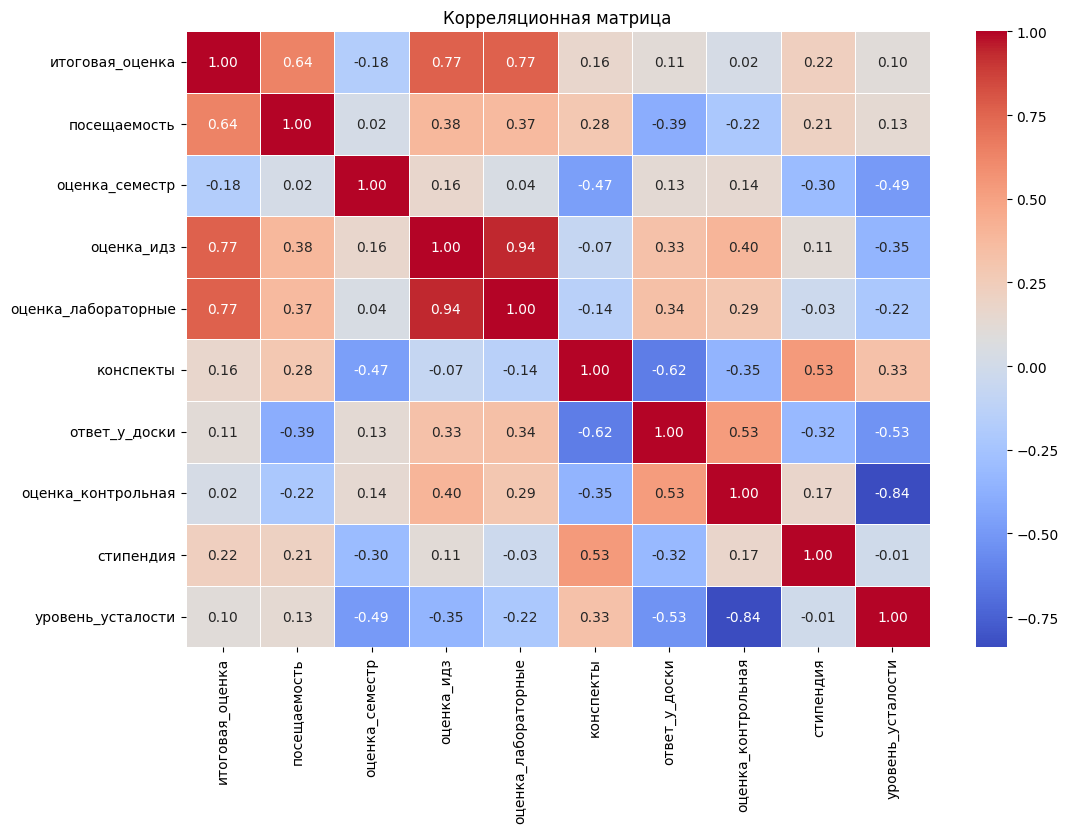

In [30]:
df = df.drop(columns=['статус_трудоустройства', 'зарплата', 'наличие_кота', 'братья_сестры', 'попытки_экзамен', 'психическое_здоровье', 'школьная_оценка'])
c_m = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

<h3>Модель: оценка ошибок и визуализация</h3>

In [36]:
X = df[['оценка_лабораторные', 'оценка_идз']]
y = df['итоговая_оценка']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 0.98
R-squared: 0.55
